<a href="https://colab.research.google.com/github/Rahul-phyton-code/Simple-Linear-Regression/blob/main/Simple_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression**

# **Steps to follow-**

# **1.) Read Dataset**

# **2.) Divide feature based on independent and dependent feature.**

# **3.) Train test split of dataset**

# **4.) Standardize the dataset**

# **5.) Training model with linear regression**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# Load the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving height-weight.csv to height-weight (1).csv


# **Step 1 - Read the dataset**

In [ ]:
# Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Consider **weight as independent feature** and **height as dependent feature**

So we have to make a model in such a  way that if we give input as 'weight' then our model predict 'height'

Text(0, 0.5, 'Height')

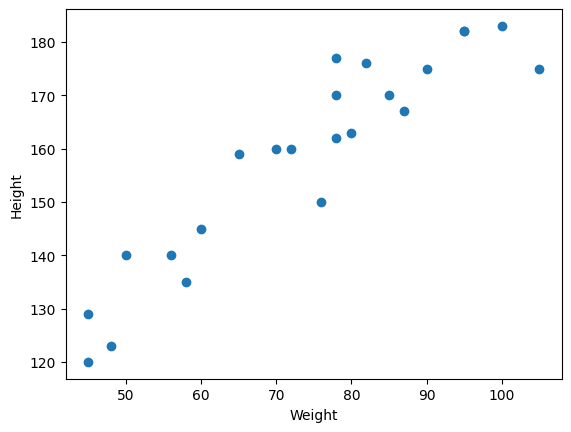

In [ ]:
# see dataset via graph
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight') ## independent feature
plt.ylabel('Height') ## dependent feature

Note - Our main aim is to take this dataset **to create best fit line** in such a way that if **we do difference between actual and predicted point it should be minimal.**

# **Step 2 - Divide feature based on independent and dependent feature**

In [ ]:
X = df[['Weight']] #independent feature
y=df[['Height']] #dependent feature
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [ ]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


# **Step 3 - Train test split of dataset**

- Train model with training dataset

- Test model with test dataset

Google ------ sklearn train test ------- use sklearn.model_selection for training purpose.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


# **X_train = independent(input) feature for training dataset/model**

# **y_train = dependent(output) feature for training dataset/model**

# **X_test = independent(input) feature for testing dataset/model**

# **y_test = dependent(output) feature for testing dataset/model**


**test_size = 0.20 (means 20% of datapoints in X consider as test data (Ex- if there are 100 records in X out of that if i write (test_size = 0.20) then it means 20 records will put in test data & remaining 80% used in training data for training model**


**random_state = 42 (seed value)**



In [ ]:
X



,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [ ]:
X.shape

(23, 1)

# **Observation - There are 23 records (rows) and 1 column**

In [ ]:
# Independent variable
X_train.shape

(18, 1)

In [ ]:
X_test.shape

(5, 1)

# **Observation - since we using (test_size = 0.20) for X_train and X_test which means (initial 23 rows in X(indep. variable) .... 20 % of test_size means **

# taking 20% of data for testing - 23 x (20/100) = 4.-- = 5 records

# remaining 80% of data for training - 23 x (80/100) = 18 records


In [ ]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [ ]:
y.shape

(23, 1)

# **y(dep. variable) also has 23 rows and 1 column**

In [ ]:
# Dependent variable

y_train.shape

(18, 1)

In [ ]:
y_test.shape

(5, 1)

# **Observation - since we using (test_size = 0.20) for y_train and y_test which means (initial 23 rows in y(dep. variable) .... 20 % of test_size means **

# taking 20% of data for testing - 23 x (20/100) = 4.-- = 5 records

# remaining 80% of data for training - 23 x (80/100) = 18 records


# **Step 4 - Standardize the dataset - Train independent dataset(X)**

# **Not train dep. dataset(y)**

# **Why we have to standardize the dataset?**

Text(0, 0.5, 'Height')

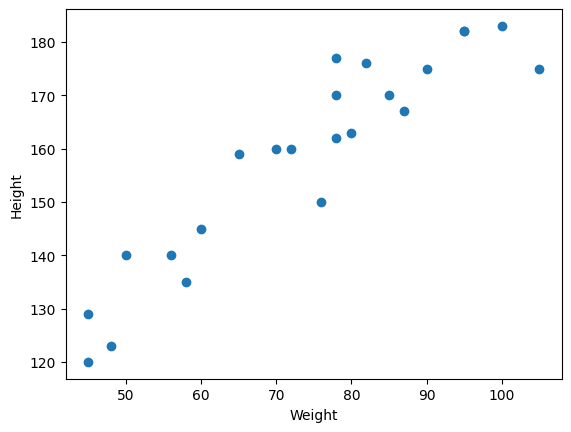

In [ ]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight') ## independent feature
plt.ylabel('Height') ## dependent feature

**We need to scale down data so that our gradient descent optimization will** **happen quickly , if we have very big values 40 to 100 then everytime i must** **have to calculate cost function by calculating best fit line , finding the** **error . While finding error there will be bigger no. what if we scaled down** **all this wt. values in a standardize format & then probably training model** **in such a way that we will be quickly optimize or convert in gradient descent.**

**Also , standardize doesn't mean used in every algorithm when there is distance based algorithm , optimization type algoritm.**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standard Scaler - Applying Z-score formula

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [ ]:
# Standardize trained independent dataset

X_train = scaler.fit_transform(X_train)


# **Note**

# **1.) when applying fit_transform means fit first calculate mean , standard deviation... of X-train dataset one by one.**

# **2.) then transform try to change value of X_train dataset one by one by applying z-score.**

# **3.) Training Data -------- fit_transform (Model only know about trained data)**

In [ ]:
X_test = scaler.transform(X_test)

# **Note**

#  **1.) Don't need to fit_transform again because we don't have to calculate mean,standard deviation that is utilized in z-score , it is basically being used from X_train itself.**

# - **or , it is basically use (std. dev. , mean) of X_train then it will take datapoints from X_test(5 records) one by one  and then subtract it from  (std. dev. , mean) of X_train.**

# **2.) Test data ------------------- transform (Model doesn't know anything about test data).**

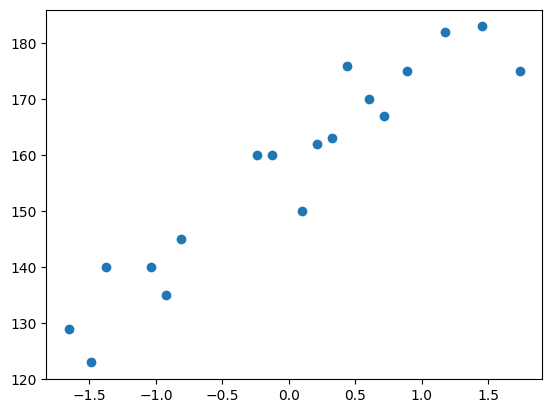

In [ ]:
# Visualise scaled down independent feature

plt.scatter(X_train,y_train)

# **Insights - X_train scaled down between -1.5 to 1.5**

# **Step5 - Train Model with Linear Regression (For training model using linear regression in case of regression problem statement - get "Best Fit Line" , "slopes" of independent feature)**

In [ ]:
# Train the Simple Linear Regression Model

from sklearn.linear_model import LinearRegression



# **class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)  - This model helps to find best fit line and all slopes of independent features.**

#   **Let  LinearRegression = regressor**

# **a.) LinearRegression.fit(X_train,y_train) - For trained both indep./dep. feature**

# **b.) LinearRegression.coef_  - For finding coefficient of indep. feature**

# **c.) LinearRegression.intercept_ - For finding intercept**

# **d.) LinearRegression.predict(X_train) - For predicting trained indep. feature**



In [ ]:
# After writing LinearRegression all parameters inside LinearRegression model consider automatically in regressor variable.

regressor = LinearRegression()

In [ ]:
# (regressor.fit) basically trained particular dataset and find out all points w.r.t different different slopes of both X_train and y_train.

regressor.fit(X_train, y_train)

LinearRegression()

# **Getting slope or coefficient of independent feature(Weight)**

In [ ]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [[17.03440872]]
Intercept: [157.5]


# **hθ(x) or y(i) = θ0 + θ1 x(i)**

# **θ0 = intercept = 157.5**

# **θ1 = slope = 17.03**

# **x = independent variable**

# **y(i) = Predicted points [by which draw best fit line by changing θ0 and θ1 value until get best fit line with minimal error(after summation of error between predicted and actual point is minimal choose that best fit line)and after taking x(one by one) inside given above formula]**

**Now tends to draw best fit line on trained dataset of X(indep.) and y(dep.) feature given below**

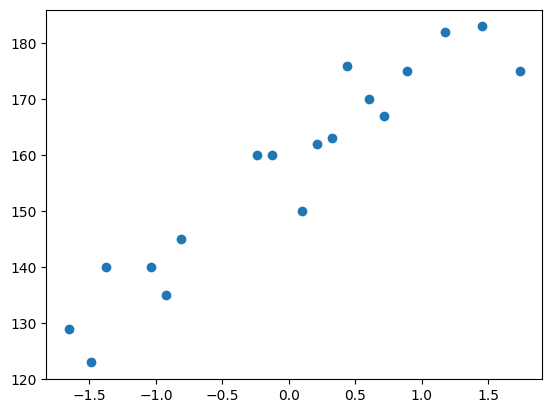

In [ ]:
plt.scatter(X_train,y_train)

# **a.) Since we have to predict dep. variable(new height) by indep. variable(new weight ) so on predict use only indep. trained data**

# **Create Best Fit line(Prediction by X_train for y_train)**

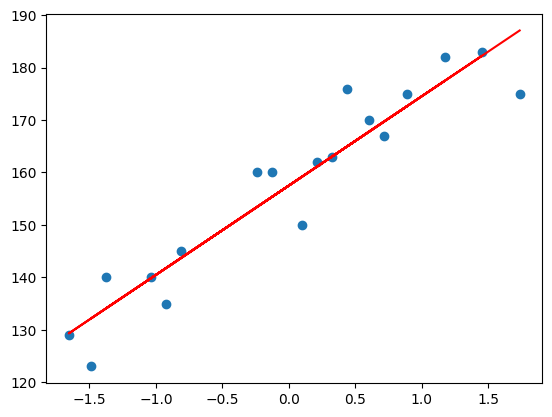

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')


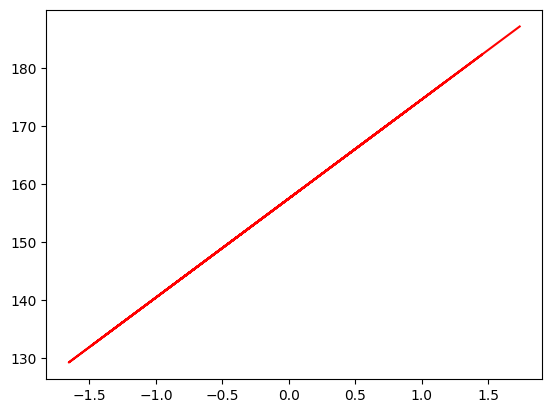

In [ ]:
plt.plot(X_train,regressor.predict(X_train),'r')

## **Main aim is to predict new height(dep. feature - trained(80%) and test(20%) ) by new weight(indep.feature)**

# **Prediction for train data of dependent variable by train data of indep. variable**



In [ ]:
y_pred_train = regressor.predict(X_train)

y_pred_train

array([[187.0869102 ],
       [141.82375282],
       [182.27168069],
       [161.08467086],
       [132.19329381],
       [177.45645118],
       [129.3041561 ],
       [143.74984463],
       [153.38030364],
       [159.15857905],
       [134.11938561],
       [139.89766102],
       [155.30639545],
       [172.64122168],
       [164.93685446],
       [167.82599217],
       [169.75208397],
       [163.01076266]])

# **y_pred_train = predicted output for height(dep. var.) on basis of prediction of of X(Weight- dep. var.) for training dataset**

# **y_train = Train dataset for height(dep. var.) [80%]**

In [ ]:
y_pred_train,y_train

(array([[187.0869102 ],
        [141.82375282],
        [182.27168069],
        [161.08467086],
        [132.19329381],
        [177.45645118],
        [129.3041561 ],
        [143.74984463],
        [153.38030364],
        [159.15857905],
        [134.11938561],
        [139.89766102],
        [155.30639545],
        [172.64122168],
        [164.93685446],
        [167.82599217],
        [169.75208397],
        [163.01076266]]),
     Height
 12     175
 1      135
 13     183
 5      162
 2      123
 11     182
 20     129
 3      145
 4      160
 18     150
 16     140
 21     140
 22     160
 7      175
 10     176
 14     170
 19     167
 6      163)

# **Predicted height output = intercept + coef_(weights)**


# ** or**

# **hθ(x) or y(i) = θ0 + θ1 x(i)**

# **y_pred_train = 157.5 + 17.03(X_train)**

# **b.) Since we have to predict dep. variable(new height) by indep. variable(new weight ) so on predict use only dep. test data**

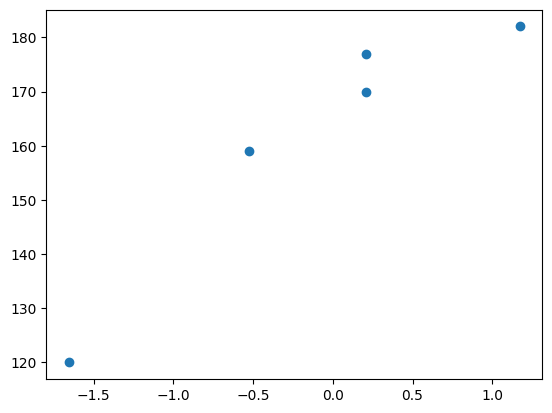

In [ ]:
plt.scatter(X_test,y_test)

# **Create Best Fit line(Prediction by X_test for y_test)**

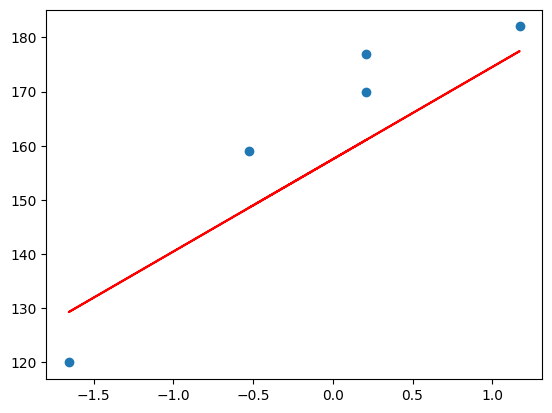

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

# **Prediction for test data of dependent variable by test data of indep. variable**

In [ ]:
y_pred_test = regressor.predict(X_test)

y_pred_test

array([[161.08467086],
       [161.08467086],
       [129.3041561 ],
       [177.45645118],
       [148.56507414]])

# **y_pred_test = predicted output for height(dep. var.) on basis of prediction of of X(Weight- dep. var.) for testing dataset**

# **y_test(Actual Output) = Test dataset for height(dep. var.) [20%]**

In [ ]:
y_pred_test,y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

# **Predicted height output = intercept + coef_(weights)**


# ** or**

# **hθ(x) or y(i) = θ0 + θ1 x(i)**

# **y_pred_test = 157.5 + 17.03(X_test)**

# **Cost Function**

# 1.) Mean Square error(MSE)

# 2.) Mean Absolute error(MAE)

# 3.) Root Mean Squared error(RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mse=mean_squared_error(y_test,y_pred_test)
# y_test = Real value
# y_pred_test = This is what model has predicted
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


# **Insights - As all these rendered errors mitigates , model tends to perform Better.**

# **Performance Metrics used in Linear Regression (to find out accuracy of model)**

# **1.) R Square**

# **Formula**

# **R^2 = 1 - SSR/SST**


# R^2	=	coefficient of determination

# SSR	=	sum of squares of residuals (Distance b/w actual & predicted point for Best fit line)

# SST	=	total sum of squares(Distance b/w actual & predicted point for mean(average of y))

# Note - Error which we're getting from best fit line should be less than (avg. of y)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)


In [ ]:
score

0.776986986042344

# **2.) Adjusted R Square**

# **Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

# where:

# R2: The R2 of the model

# n: The number of observations

# k: The number of predictor variables

In [ ]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# 1-score = R Square
# len(y_test) = n
# X_test.shape[1] = No. of predictor variables

0.7026493147231252

# **Insights**

# **R Square > R Adjusted Square**

# **What Steps we have to do for new data points?**

In [ ]:
regressor

# It is basically linear w.r.t linear regression model whenever we get new datapoint

LinearRegression()

# **Consider new data point(Weight) is 80kg , i have to predict new height for that?**

In [ ]:
scaled_weight = scaler.transform([[80]])
scaled_weight

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [ ]:
scaled_weight[0]

array([0.32350772])

In [ ]:
print("The height prdiction for weight 80 kg is:", regressor.predict([scaled_weight[0]]))

The height prdiction for weight 80 kg is: [[163.01076266]]


# **Assumptions for trained very good regression model must have to test while testing linear regression model**

# **1.) Scatter plot must be linearly distributed , if it is linearly distributed then it means you have done very good prediction**

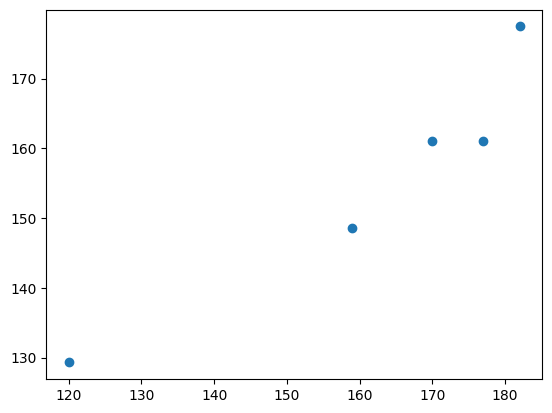

In [ ]:
# Plot Scatter Plot for Prediction

plt.scatter(y_test,y_pred_test)

# **Observation - Since Scatterplot is linearly distributed which means prediction is good.**

# **2.) Residuals (Difference between actual and predicted point)**

In [ ]:
# Residuals

residuals = y_test - y_pred_test

residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


<ipython-input-93-fb8a57e3686d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: ylabel='Density'>

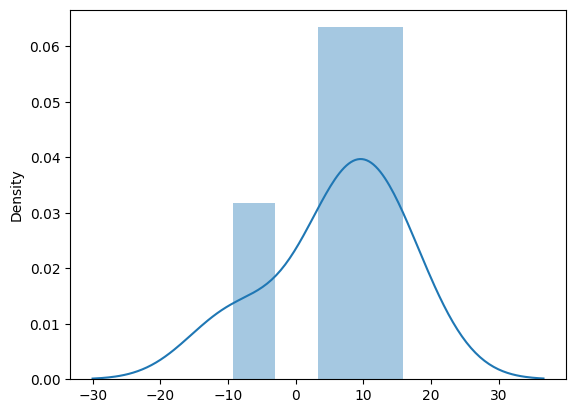

In [ ]:
# Plot the residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

# **Observation - Look like little bit left skewed but it's Normal distribution (Residual is between -30 to 30)**

# Scatter plot w.r.t Prediction and residuals
# Uniform Distribution

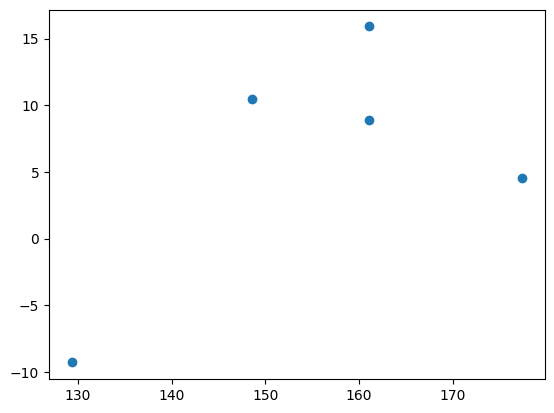

In [ ]:
plt.scatter(y_pred_test,residuals)

# **Crucial Note**

# **If graph is uniformly distributed (means datapoints available here and there [+ve and -ve side] w.r.t  y_pred_test and residuals  - Then it also means good model.**